In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from math import sin, cos

import checker
import utils

## Po co nam ten numpy?
Przydaje nam się z kilku powodów:
* Napisanie jednej linijki w numpy jest szybsze i wygodniejsze niż napisanie pętli, jest też mniejsza szansa, że zrobimy gdzieś po drodze błąd. Oczywiście najpierw trzeba się przyzwyczaić do intefejsu.
* Numpy jest znacznie bardziej wydajny niż napisane przez nas funkcje w "czystym" Pythonie.
* PyTorch, biblioteka do głębokiego uczenia, z której później będziemy korzystać, ma bardzo podobny interfejs.

**Kilka przykładów:**

In [2]:
%%timeit

X = [random.random() for _ in range(10000)]
y = [sin(x) + cos(x) for x in X]

1.57 ms ± 32.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
%%timeit

X = np.random.random(10000)
y = np.sin(X) + np.cos(X)

232 µs ± 5.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def numpy_almost_var(x):
    m = np.mean(x)
    powers = (x - m) ** 4
    return np.mean(powers)

X = np.random.random(10000)

In [6]:
%%timeit
almost_variance(X)

6.66 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%%timeit
numpy_almost_var(X)

236 µs ± 3.53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Zadanie 1
Wykonać poniższe ćwiczenia przy pomocy Numpy:

1. Wykorzystując `broadcasting` (patrz na rysunek poniżej) stwórz funkcję, która dla zadnego $K$ zwraca tabliczkę mnożenia, tzn. tablicę $A$ taką, że: $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,K\}$$
    <img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

    Przydatne funkcje: `np.arange`, `np.reshape`. 

In [13]:
def multiplication_table(K):
    x = np.arange(K)+np.ones(K)
    y = np.arange(K).reshape(K,1)+np.ones(K).reshape(K,1)
    #print(x)
    #print(y)
    return x * y

print("Wynik funkcji multiplication:\n", multiplication_table(10))
checker.check_multiplication_table(multiplication_table)

Wynik funkcji multiplication:
 [[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]


2. Mając daną tablice jednowymiarową oraz liczbę `x` znajdź najbliższą wartość `x` w `A`, tzn. 
    $$ \mathrm{closest}(x, A) = \arg\min_{a\in A}|x - a|  $$

    Przydatne funkcje: `np.argmin`, `np.abs`. 

In [14]:
def closest(x, A):
    B = abs(A-x)
    return A[np.argmin(B)]

print("Wynik funkcji closest:", closest(9, np.array([5, 8, 14])))
checker.check_closest(closest)

Wynik funkcji closest: 8


3. Zaimplementuj proste liczenie wartosci wielomianu o zadanych współczynnikach (analogię `np.poly1d`), czyli funkcję

    $$
    \mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
    $$

    Potencjalnie przydatne funkcje: `np.cumprod`, `np.concatenate`, `np.sum`.

In [18]:
def poly(x, a):
    xes = np.ones(len(a))*x
    xes = np.cumprod(xes)
    xes /= x
    return sum(a*xes)

print("Wynik funkcji poly:", poly(3, np.array([1, 2, 4])))
checker.check_poly(poly)

Wynik funkcji poly: 43.0


## Zadanie 2
Dla macierzy $X$ o wymiarze `[N, D]` zaimplementować operację whiteningu: 

$\mathrm{whiten}(X) = (X-\mathrm{mean} X)(\mathrm{cov} X)^{-1/2}$

$\mathrm{mean} X$ rozumiemy jako wektor wierszowy, którego każdy element jest zdefiniowany jako: $$(\mathrm{mean}X)_i = \frac{1}{N} \sum_{j=1}^N X_{ij}$$

**Uwaga 1: np.cov przyjmuje, że każdy wiersz macierzy to osobna cecha, a każda kolumna to osobna obserwacja - czyli odwrotnie niż u nas. Dlatego przed podaniem naszej macierzy do np.cov trzeba ją transponować.**

**Uwaga 2: pierwiastek z macierzy to nie to samo co pierwiastkowanie element-wise, takie jak w np.sqrt. Najlepiej poszukać odpowiedniej funkcji w bibliotece scipy i ją zaimportować.**

In [12]:

def whiten(X):
    N = len(X[0])
    D = len(X)
    cov = np.cov(X.reshape(N,D)) ** (-1/2) # może w drugą stronę???
    m = X.mean(axis=1)
    
    ans = X
    for i in range(len(X)):
        ans[i] = (X[i]-m[i]) * cov
    
    print("tutaj!")
    print(ans)
    #rint(X)
    #print(cov)
    #print(m)
    #print(X*m)
    #print(X-m)
    #print(N)
    #print(D)
    #print(X)
    #print(X.reshape(N,D))
    #print(cov)
    return ans
    

tutaj!
[[-6.56275014e+00  9.71302894e-01]
 [-1.24786482e+01  6.52474185e-01]
 [ 3.26929021e+00  1.90911029e+00]
 [-4.42764135e+00  1.14038869e+00]
 [-7.12250306e+00  1.62226434e+00]
 [-1.75909175e+00  2.45952670e+00]
 [-8.66254391e+00  8.31760381e-01]
 [ 3.42936496e+00  1.79823752e+00]
 [-1.99592001e-01  2.02672182e+00]
 [ 7.44069603e-01  2.90360153e+00]
 [-6.70727240e+00  6.73259936e-01]
 [-7.36965697e+00  1.76187964e+00]
 [-5.03284293e+00  2.19057660e+00]
 [-1.22353344e+01  1.89236536e+00]
 [-6.48172036e+00  1.76654641e+00]
 [-8.73279289e+00  3.03340748e+00]
 [-4.10870086e+00  2.85588131e+00]
 [-4.94589483e+00  2.73638393e+00]
 [-6.51940549e+00  2.39535880e+00]
 [-4.76528297e+00  2.71354593e+00]
 [-2.27420737e+00  3.13484949e+00]
 [-1.04344393e+01  1.81584090e+00]
 [-6.23722197e+00  2.50774101e+00]
 [-2.31879952e+00  2.23062235e+00]
 [-3.14494735e+00  2.62343698e+00]
 [-1.23455960e+00  2.11008290e+00]
 [-3.25346553e+00  1.40615334e+00]
 [-5.51087713e+00  1.21789673e+00]
 [-5.54207791

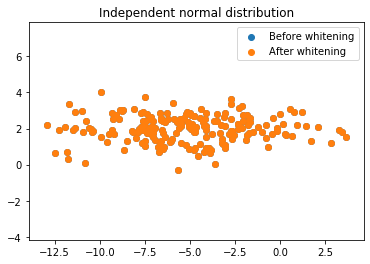

tutaj!
[[-4.9829936  -1.79936753]
 [-5.28187104 -2.21410775]
 [-4.13687391 -1.05842376]
 [-3.88252452 -1.03714679]
 [-5.72628083 -2.59267254]
 [-4.97719164 -1.98004804]
 [-3.38487538 -0.45848329]
 [-5.64776607 -2.5799279 ]
 [-5.07514009 -2.02778928]
 [-5.19030728 -2.31744319]
 [-4.28402517 -1.37594456]
 [-2.76046354  0.15790506]
 [-5.30897141 -2.22609652]
 [-4.19038433 -1.14437779]
 [-4.26221155 -1.54057125]
 [-4.1498255  -1.24045086]
 [-5.70795806 -2.95539969]
 [-3.69613066 -0.67442907]
 [-4.57005337 -1.50516547]
 [-5.35418185 -2.43980025]
 [-5.56481962 -2.45302274]
 [-5.30401175 -2.53111475]
 [-5.86163187 -2.88910726]
 [-4.35938141 -1.47898709]
 [-4.85397266 -1.73179079]
 [-5.76714265 -2.78545978]
 [-4.66263751 -1.47204613]
 [-4.55166234 -1.59466493]
 [-6.60014553 -3.87224152]
 [-3.78447276 -1.01473075]
 [-5.25862094 -2.20586356]
 [-5.37753829 -2.29595757]
 [-5.97195372 -3.01576475]
 [-5.022559   -2.01492743]
 [-2.98420012  0.02440176]
 [-5.59892036 -2.35681434]
 [-5.01680894 -2.0044

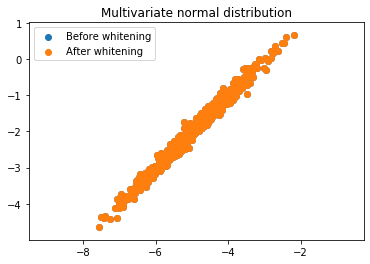

tutaj!
[[-3.62466219  3.18106929]
 [ 7.74752608  7.37867544]
 [13.5031005   4.24681536]
 [ 9.3430384   6.60004881]
 [-4.28192779  3.8596853 ]
 [ 1.57522011  1.85998457]
 [ 8.54812108  3.63062811]
 [10.4892833   9.71298277]
 [11.31668635  7.17296996]
 [ 5.29532348  4.7269453 ]
 [ 8.63999113  8.03969541]
 [ 3.76167235 11.72488391]
 [13.27343319 13.09320379]
 [ 1.40178453 12.74787662]
 [ 8.69024937  3.24310692]
 [10.31136356 10.00537392]
 [ 0.99590637  5.40778746]
 [13.40783004 11.60210604]
 [ 1.85952629 -0.23335366]
 [ 9.6736008  -1.67340535]
 [-1.98411108 -2.67579361]
 [ 4.0436333   7.64715042]
 [ 5.87908121 -2.6774166 ]
 [ 9.14246952 13.06776373]
 [10.72532859  9.18197065]
 [-3.45267628  4.65362878]
 [ 6.95441284  7.12158538]
 [-5.18151163  6.35180723]
 [ 3.54666763 11.80942311]
 [16.44729863  8.59283595]
 [ 0.94224957  9.71083924]
 [ 4.21582285  4.69728138]
 [ 5.95779233 10.43712341]
 [11.61409377  2.33921879]
 [ 1.7448155   9.0776951 ]
 [ 7.43436873  8.0880103 ]
 [ 8.21415057 14.8048

<ipython-input-12-43553cac8b48>:4: RuntimeWarning: invalid value encountered in power
  cov = np.cov(X.reshape(N,D)) ** (-1/2) # może w drugą stronę???


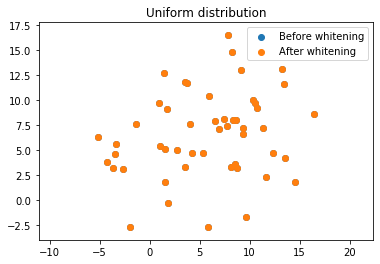

tutaj!
[[-4.9829936  -1.79936753]
 [-5.28187104 -2.21410775]
 [-4.13687391 -1.05842376]
 ...
 [-3.91874901  0.63400203]
 [-9.09941034  2.74713974]
 [-2.34758617  2.23601753]]


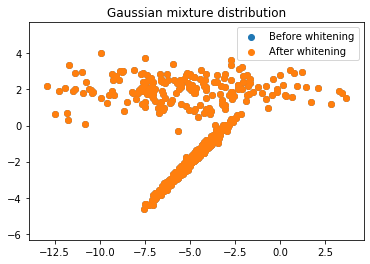

In [13]:
X_diag_normal = np.random.multivariate_normal([-5, 2.], [[10, 0], [0, 0.5]], size=200)
X_multivariate_normal = np.random.multivariate_normal([-5, -2], [[1, 0.99], [0.99, 1]], size=500)
X_uniform = np.random.normal(6, 5, size=(50, 2))
X_gmm = np.concatenate((X_multivariate_normal, X_diag_normal), axis=0)
    
utils.scatter_with_whiten(X_diag_normal, whiten, name="Independent normal distribution")
utils.scatter_with_whiten(X_multivariate_normal, whiten, name="Multivariate normal distribution")
utils.scatter_with_whiten(X_uniform, whiten, name="Uniform distribution")
utils.scatter_with_whiten(X_gmm, whiten, name="Gaussian mixture distribution")

## Standaryzacja a whitening
W pierwszym notebooku implementowaliśmy następującą funkcję, która wykonuje zadanie podobne do whiteningu:

$$ f(x_{ij}) = \frac{x_{ij} - \mu_j}{\sigma_j} $$

Tę funkcję nazwijmy **standaryzacją**. Czym zatem różni się standaryzacja od whiteningu? Czy nie wystarczy znormalizować kolumn i zamiast tego musimy wykonywać znacznie bardziej kosztowną operację liczenia i odwracania macierzy kowariancji?

In [ ]:
utils.scatter_with_whiten(X_diag_normal, whiten, name="Independent normal distribution", standarize=True)
utils.scatter_with_whiten(X_multivariate_normal, whiten, name="Multivariate normal distribution", standarize=True)
utils.scatter_with_whiten(X_uniform, whiten, name="Uniform distribution", standarize=True)
utils.scatter_with_whiten(X_gmm, whiten, name="Gaussian mixture distribution", standarize=True)

# Zadanie 3
Należy:
1. Wysamplować $10000$ przykładów z rozkładu normalnego $\mathcal{N}(\mu, \sigma)$. **Należy wybrać niestandardowe parametry**, tzn. $\mu \neq 0$ oraz $\sigma \neq 1$.
2. Następnie należy policzyć, jaki procent wylosowanych przykładów, znajduje się od środka w odległości większej niż: 
    * $1\sigma$ (tzn. $|x - \mu| > 1\sigma$)
    * $2\sigma$ (tzn. $|x - \mu| > 2\sigma$)
    * $3\sigma$ (tzn. $|x - \mu| > 3\sigma$)
    
3. Wypisać wszystkie przykłady, które wpadają do ostatniej kategorii (tzn. są oddalone o co najmniej $3\sigma$ od średniej).

In [14]:
# Podpunkt 1: Wysamplować 10000 przykładów z rozkładu normalnego
loc = ??? # średnia wybranego rozkładu normalnego
scale = ??? # odchylenie standardowe wybranego rozkładu normalnego
X = np.random.normal(???)

# Podpunkt 2: Wyliczyć i wypisać procent 

# Podpunkt 3: Wypisać elementy, które są oddalone od średniej o 3 sigma.

# Trochę wizualizacji
utils.visualize_normal_dist(X, loc, scale)

SyntaxError: invalid syntax (<ipython-input-14-a199e6de27d3>, line 2)